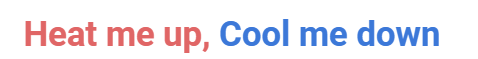

<h3 style="text-align:center"><i>Optimising the energy efficiency in Building heating and cooling systems using KNN regression model</i></h1>

<div style="text-align: center" ><b>AGDEPPA, K.R | BERDON, J | MUSTARD, R.K | TAHOYNON, S.J</b></div>

<br>

## Table of Contents
#### [I) Overview of the Problem](#Overview-of-the-Problem)

#### [II) Dataset Description](#Dataset-Description)

#### [III) Plan of Action](#Plan-of-Action)

#### [IV) KNN Regression Implimentation](#KNN-Regression-Implimentation)

#### [V) Three Highlights of the Results](#Three-Highlights-of-the-Results)

#### [VI) Discussion of Results](#Discussion-of-Results)    

<br>

## Overview of the Problem
<br>
<div style="text-align: justify" ><i>The building sectors are significant contributors to energy consumption and greenhouse gases emissions worldwide, and the Philippines is no exception. <b>Improving energy efficiency of buildings is critical to reduce their environmental impact and associated costs. Heating and cooling systems are major contributors to energy consumption accounting for a significant portion of building energy consumption. Specifically, in the Philippines, there’s a high electricity demand for air conditioning</b> (Santos et al., 2021). Building design parameters such as orientation, window-to-wall ratio, and shading devices have been an important factors in reducing heat gain and improving energy efficiency in buildings (Santos et al., 2021). The target of this study is the cooling and heating load, cooling load refers to the amount of heat energy that needs to be removed from a space to maintain a comfortable temperature range. On the other hand, the heating load is the amount of heat energy required to keep the space warm (Santos et al., 2021). Additionally, passive cooling techniques such as natural ventilation, thermal mass, and evaporative cooling can be effective in reducing cooling loads in buildings, particularly in the Philippines’ tropical and humid climate (Santos et al., 2021). Public information on the importance of energy-efficient infrastructure designs and operations are crucial.</i></div>
 
<br>
<div style="text-align: justify" ><i>In this study, the researchers aim to predict the heat and cold load to classify attributes from the dataset that can significantly affect energy efficiency. To achieve this goal, we perform energy analysis using 12 different building shapes simulated in Ecotect. <b>The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the aforementioned characteristics to obtain 768 building shapes.</b> The dataset comprises 768 samples and 8 features, aiming to predict two real-valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.</i></div>


<br>

## Dataset Description

The [dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) contains eight attributes (features) and two responses (targets). The aim is to use the eight features to predict each of the two responses.

    Features:

        Relative Compactness - It is the measure of compactness of the closure or building.

        Surface Area - Surface area of the Building.

        Wall Area - area of the building covered by the width of the wall.

        Roof Area - Area covered under roofs.

        Overall Height - Overall height of building.

        Orientation - Orientation of building based on direction like (North facing, South facing and others)

        Glazing Area - means the total area of the wall which is glass

        Glazing Area Distribution - How Glazing Area is distributed within the whole building.

    Targets:

        Heating Load - How much heating load is required to heat the building. 

        Cooling Load - How much load is required to cool the building.


<br>

## Plan of Action

*Upon the completion of this undertaking, we will be able to visualise and get a better understanding of the given dataset, identify its key features, and evaluate the performance of the kNN Regression model*

<br>

## KNN Regression Implimentation

### *Import the libraries*

In [1]:
# data manipulation
import pandas as pd
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split

# data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# data normalization
from sklearn.preprocessing import MinMaxScaler

# knn regression model
from sklearn.neighbors import KNeighborsRegressor

# performance measures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

# miscellaneous
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

### *Load the data*

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive\energy_efficiency_data.csv")

In [3]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### *Check for null values*

In [4]:
df.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

### *Getting to know the dataset*

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
df.shape

(768, 10)

### *Exploratory Data Analysis*

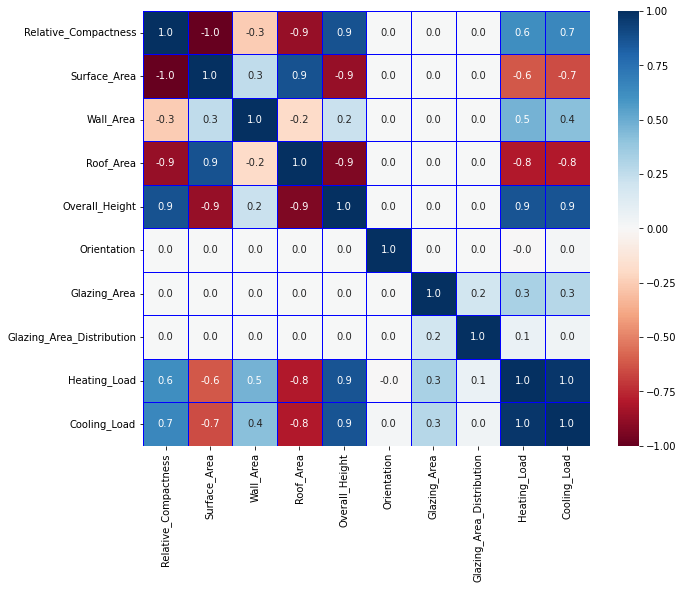

In [41]:
fig, axs = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr(method='spearman'), # show the heatmap using spearman correlation
            annot=True, 
            linewidths=0.5, 
            linecolor='b', 
            cmap='RdBu', 
            fmt='.1f')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

***Upon examiming the heatmap using the Spearman Correlation Coefficient it reveals that the relative compactness, surface area, wall area, roof area and overall height have a strong correlation with regards to the heating and cooling loads. Ergo, we will use the 5 features in the model to evaluate its performance and compare it to using all the features.***

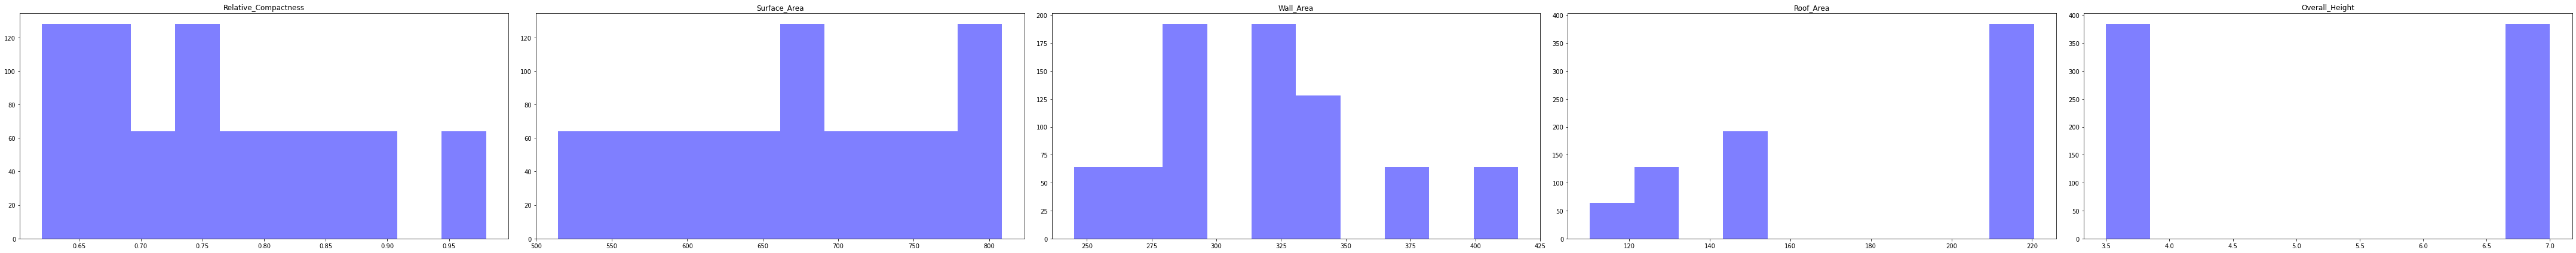

In [86]:
num_list = list(df.columns)

fig, axes = plt.subplots(1, 5, figsize=(60, 6))

for i, ax in zip(range(len(num_list)), axes):
    
    ax.hist(df[num_list[i]],color='blue',alpha=0.5)
    
    ax.set_title(num_list[i])

plt.tight_layout()

***Looking at the histogram plot, it is observed that each of the top 5 features are not normally distributed. With this, we opted to use Spearman Correlation Coefficient, also known as Rank Correlation, in assessing the relationship of the non-normal distribution features for this dataset.***

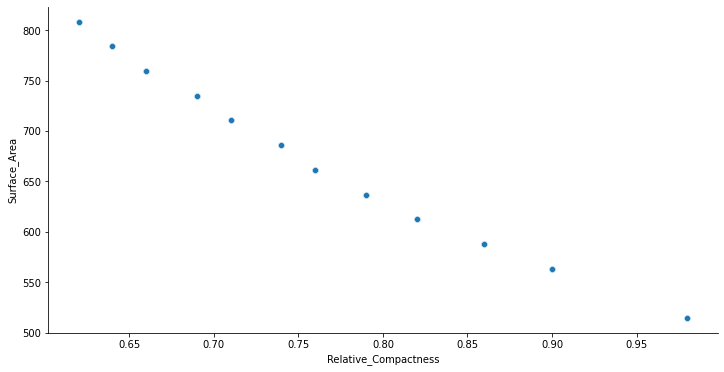

In [87]:
fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

sns.scatterplot(x=df['Relative_Compactness'], y=df['Surface_Area'])
plt.title()
plt.show()

***This shows the relationship of relative compactness and surface area. Based on the scatter plot, it indicates that there’s a negative correlation of the two attributes. It suggest that the compact buildings tend to have smaller surfaces.***

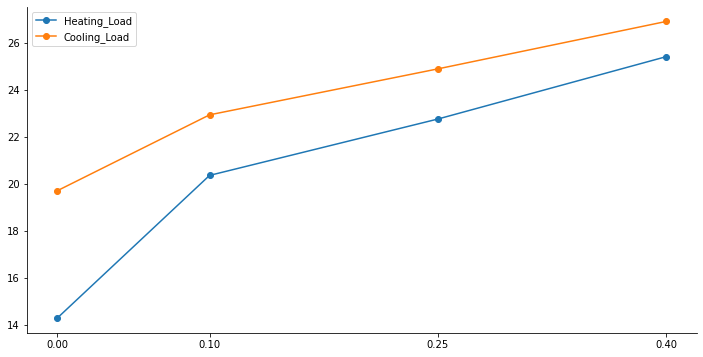

In [121]:
filtered = df[['Glazing_Area', 'Heating_Load', 'Cooling_Load']].groupby(by='Glazing_Area').mean()

fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

plt.plot(filtered.index, filtered['Heating_Load'], label='Heating_Load', marker='o')
plt.plot(filtered.index, filtered['Cooling_Load'], label='Cooling_Load', marker='o')

plt.legend()
plt.xticks(filtered.index)
plt.show()

***As the area of glazing increases within a building, so does the heating and cooling load. 
Therefore, we can say that lower glazing areas tend to be more energy-sufficient.***

### *Training the KNN Regressor*

In [4]:
final_df = df[['Relative_Compactness', 
               'Surface_Area', 
               'Wall_Area', 
               'Roof_Area',
               'Overall_Height']]

X = final_df[['Relative_Compactness', 
               'Surface_Area', 
               'Wall_Area', 
               'Roof_Area',
               'Overall_Height']]

y = df[['Heating_Load', 'Cooling_Load']]

### *Create a pipeline for normalization*

In [5]:
def normalize(dataframe: pd.DataFrame) -> pd.DataFrame:
    scaler_ = MinMaxScaler()

    for features in dataframe.columns:
        dataframe[features] = scaler_.fit_transform(dataframe[[features]])
        
    return dataframe

df = df.pipe(normalize)

### *Split the Data*

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### *Find the optimal ```k```  for this dataset*

In [7]:
def adjusted_r_sqrd(r2: float) -> float:
    N = df.shape[0]
    p = X.shape[1]
    adj_rsquared = (1 - (( 1 - r2) * (N - 1) / (N - p - 1)))
    return adj_rsquared

***Since we are dealing with a multivariate data, and $R^2$ wouldn't be a good metric since it increases as we add more and more features even if it doesn't correlate to our target variables. So adjusted $R^2$ would be a good metric for this scenario for us to be penalized for the number of features we use for the model.***

In [14]:
neighbors = range(1, 41) # testing neighbors from 1 to 40
trials = range(150) # number of trials

train_neighbor_accuracy = {}
test_neighbor_accuracy = {}

train_neighbor_std = {}
test_neighbor_std= {}

test_neighbor_rmse = {}

test_neighbor_mae = {}

for k in tqdm(neighbors):
    trial_train_accuracy = []
    trial_test_accuracy = []
    
    trial_test_rmse = []
    trial_test_mae = []
    
    hyperparameter_test_model = KNeighborsRegressor(n_neighbors=k)
    
    for _ in trials:
        
        # validation set
        Xval_train, Xval_test, yval_train, yval_test = train_test_split(X_train, y_train, test_size=0.25, random_state=None)
        
        # fit the train data from validation set
        hyperparameter_test_model.fit(Xval_train, yval_train)
        
        # calculate the adjusted r-squared
        train_ad_rsqrd = adjusted_r_sqrd(hyperparameter_test_model.score(Xval_train, yval_train))
        test_ad_rsqrd = adjusted_r_sqrd(hyperparameter_test_model.score(Xval_test, yval_test))
        
        # append the results
        trial_train_accuracy.append(train_ad_rsqrd)
        trial_test_accuracy.append(test_ad_rsqrd)
        
        y_hat = hyperparameter_test_model.predict(Xval_test)
        
        # calculate the root mean squared error
        trial_test_rmse.append(np.sqrt(mean_squared_error(yval_test, y_hat)))
        
        trial_test_mae.append(mean_absolute_error(yval_test, y_hat))
        
        
    # append the mean r-squared of train and test
    train_neighbor_accuracy[k] = np.mean(trial_train_accuracy)
    test_neighbor_accuracy[k] = np.mean(trial_test_accuracy)
    
    # append the std of r-squared of train and test
    train_neighbor_std[k] = np.std(trial_train_accuracy)
    test_neighbor_std[k] = np.std(trial_test_accuracy)
    
    # append the mean rmse
    test_neighbor_rmse[k] = np.mean(trial_test_rmse)
    test_neighbor_mae[k] = np.mean(trial_test_mae)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:42<00:00,  2.56s/it]


In [15]:
train_neighbor_accuracy

{1: 0.8306211298327,
 2: 0.8737713057293699,
 3: 0.8912717182482868,
 4: 0.8963097428238844,
 5: 0.9002912663343318,
 6: 0.902983702624526,
 7: 0.9055304111906795,
 8: 0.9069362699343454,
 9: 0.9082104695633484,
 10: 0.9092680774616589,
 11: 0.9100634025339548,
 12: 0.9106184135374442,
 13: 0.9112307260279677,
 14: 0.9116832614741277,
 15: 0.9125767282771869,
 16: 0.9126192147897416,
 17: 0.9124398324469868,
 18: 0.913586843049953,
 19: 0.9134030079371276,
 20: 0.9137763398196169,
 21: 0.9140625964874619,
 22: 0.91345078415845,
 23: 0.914610787999719,
 24: 0.914129602480568,
 25: 0.9145719243363841,
 26: 0.914983439068093,
 27: 0.9148919418274776,
 28: 0.9149869921680814,
 29: 0.9146384613028331,
 30: 0.9147242105717178,
 31: 0.9145221689199108,
 32: 0.9147153314562577,
 33: 0.91418876557253,
 34: 0.9140180827978298,
 35: 0.9129093169976592,
 36: 0.9119872792138858,
 37: 0.9112819864676912,
 38: 0.9087781886425625,
 39: 0.9069326290489729,
 40: 0.9059388988780486}

In [16]:
test_neighbor_accuracy

{1: 0.8298347010853834,
 2: 0.8670465379395379,
 3: 0.8841382037341998,
 4: 0.8897884638814787,
 5: 0.89475208251399,
 6: 0.896848125393052,
 7: 0.8986934530352089,
 8: 0.9018661818713781,
 9: 0.9031257261712337,
 10: 0.9033896530219565,
 11: 0.9049479302885406,
 12: 0.9057575278473966,
 13: 0.9055339199569111,
 14: 0.9068730672206241,
 15: 0.9046282896100176,
 16: 0.9069844709242585,
 17: 0.908329466264492,
 18: 0.9062894075280985,
 19: 0.9079809084048528,
 20: 0.9074007213910208,
 21: 0.9075203147213419,
 22: 0.9106707096188408,
 23: 0.9074353876923877,
 24: 0.909441585689871,
 25: 0.9090862080454584,
 26: 0.908135592632038,
 27: 0.90850429467388,
 28: 0.9090731312464232,
 29: 0.9106323954026004,
 30: 0.9096092178575541,
 31: 0.9100633873652971,
 32: 0.908676823687991,
 33: 0.9079974426067072,
 34: 0.9065953829554939,
 35: 0.9060261302698265,
 36: 0.9042287430043363,
 37: 0.9030172535920424,
 38: 0.9017050456108894,
 39: 0.9007311249930522,
 40: 0.8980127385813917}

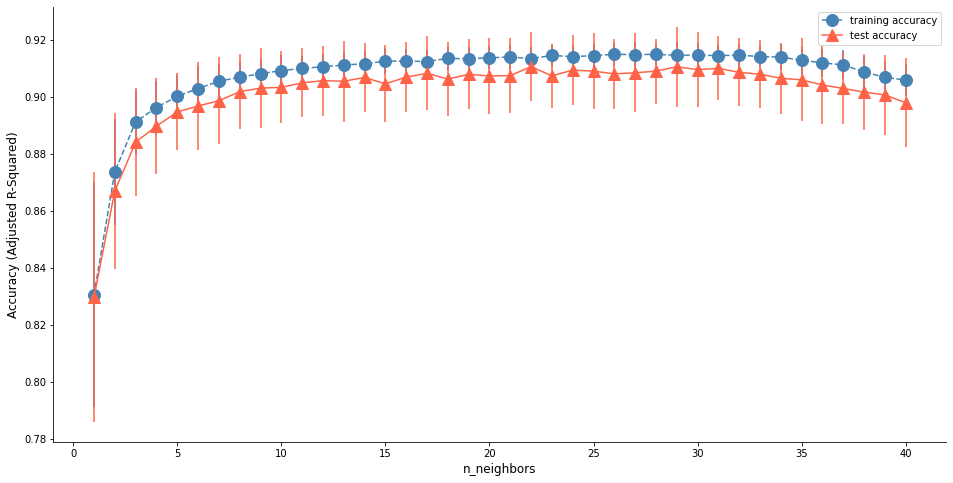

In [17]:
fig, axs = plt.subplots(figsize=(16, 8))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

plt.errorbar(neighbors, 
             train_neighbor_accuracy.values(),
             yerr=list(train_neighbor_std.values()), 
             label="training accuracy", 
             color='steelblue', 
             marker='o', 
             linestyle='dashed', 
             markersize=12)

plt.errorbar(neighbors, 
             test_neighbor_accuracy.values(),
             yerr=list(test_neighbor_std.values()), 
             label="test accuracy", 
             color='tomato', 
             marker='^', 
             linestyle='-', 
             markersize=12)

plt.ylabel("Accuracy (Adjusted R-Squared)", fontsize=12)
plt.xlabel("n_neighbors",fontsize=12)

plt.legend()
plt.show()

***The as n_neighbor increases, the adjusted r-squared increases as well. Moreover, the n_neighbor = 1 gives the lowest accuracy out of all n_neighbors, with the highest standard deviation as well, meaning that it gives different accuracies per trial. In addition, n_neighbor = 22 gives the highest $R^2$ out of all the n_neighbors, and it gives consistent results upon each trial by looking at the error bars.***

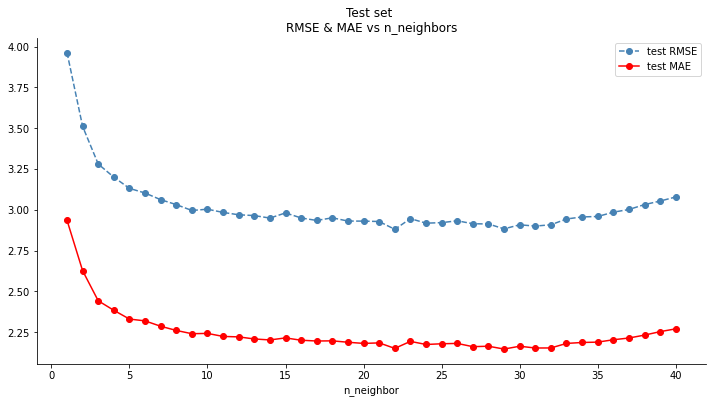

In [19]:
fig, axs = plt.subplots(figsize=(12, 6))

for s in ['top', 'right']:
    axs.spines[s].set_visible(False)

plt.plot(neighbors, 
         test_neighbor_rmse.values(),
         label="test RMSE", 
         color='steelblue', 
         marker='o', 
         linestyle='dashed')

plt.plot(neighbors, 
         test_neighbor_mae.values(),
         label="test MAE", 
         marker='o',
        color='red')

plt.title('Test set \nRMSE & MAE vs n_neighbors')
plt.xlabel('n_neighbor')
plt.legend()
plt.show()

In [20]:
sorted(test_neighbor_rmse.items(), key = lambda k: k[1])[:5]

[(22, 2.879941198719458),
 (29, 2.883038219832377),
 (31, 2.8999883354786524),
 (30, 2.9078286378825906),
 (32, 2.908041346535268)]

In [21]:
sorted(test_neighbor_mae.items(), key=lambda k: k[1])[:5]

[(29, 2.146256425606641),
 (22, 2.1504683501683504),
 (31, 2.15278630525687),
 (32, 2.1530989872685184),
 (27, 2.160961282578875)]

***Looking at the chart above, using RMSE & MAE to find the optimal n_neighbor, the RMSE or Root Mean Squared Error which is an L2 Loss function, the n_neighbor = 22 gives the lowest RMSE out of all the n_neighbor, an important indication that this is the optimal parameter. Moreover, the MAE or Mean Absolute Error also ranks the n_neighbor = 22 as one of the top 5 whose MAE are the lowest. By looking at the results, we can conclude that the optimal n_neighbor for this dataset is ```22```, as it gives a high adjusted $R^2$ (considering that we are using 5 features) and a low RMSE and MAE.***

### *Train and test the regressor using 150 trials & ```n_neighbors``` = 22 (Top 5 Features)*

In [92]:
X = df[['Relative_Compactness', 
        'Surface_Area', 
        'Wall_Area', 
        'Roof_Area',
        'Overall_Height']]

y = df[['Heating_Load', 'Cooling_Load']]

In [67]:
train_neighbor_accuracy = []
test_neighbor_accuracy = []

y_hat_per_trial = []
y_test_per_trial = []

test_rmse = []
test_mae = []

trials = range(150)

for _ in tqdm(trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
    
    model = KNeighborsRegressor(n_neighbors = 22)
        
    # fit the train data from validation set
    model.fit(X_train, y_train)
    
    # calculate the adjusted r-squared
    train_ad_rsqrd = adjusted_r_sqrd(model.score(X_train, y_train))
    test_ad_rsqrd = adjusted_r_sqrd(model.score(X_test, y_test))
        
    # append the results
    train_neighbor_accuracy.append(train_ad_rsqrd)
    test_neighbor_accuracy.append(test_ad_rsqrd)
        
    y_hat = model.predict(X_test)

    y_hat_per_trial.append([np.mean(y_hat[:, 0]), np.mean(y_hat[:, 1])])
    
    y_test_per_trial.append([np.mean(y_test['Heating_Load']), np.mean(y_test['Cooling_Load'])])
        
    # calculate the root mean squared error
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_hat)))
        
    test_mae.append(mean_absolute_error(y_test, y_hat))
    
results = {'Adjusted R^2 Train':np.mean(train_neighbor_accuracy),
           'Adjusted R^2 Test':np.mean(test_neighbor_accuracy),
          'RMSE':np.mean(test_rmse),
          'MAE':np.mean(test_mae)}

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:03<00:00, 47.65it/s]


In [11]:
results

{'Adjusted R^2 Train': 0.9125017540318604,
 'Adjusted R^2 Test': 0.9087045767164004,
 'RMSE': 2.944578663679613,
 'MAE': 2.1954998974116164}

In [81]:
results_df = pd.DataFrame()

y_test_results = np.array(np.matrix(y_test_per_trial))
y_hat_results = np.array(np.matrix(y_hat_per_trial))

results_df['Heating_Load (y_test)'] = y_hat_results[:, 0]
results_df['Heating_Load (y_pred)'] = y_test_results[:, 0]

results_df['Cooling_Load (y_test)'] = y_hat_results[:, 1]
results_df['Cooling_Load (y_pred)'] = y_test_results[:, 1]

results_df.head()

,Heating_Load (y_test),Heating_Load (y_pred),Cooling_Load (y_test),Cooling_Load (y_pred)
0,22.972971,23.461823,25.244306,25.682604
1,23.658388,23.589167,25.839214,25.636458
2,22.064853,21.867396,24.442557,24.091146
3,22.772765,22.488646,24.919936,24.858542
4,21.200672,21.342344,23.607424,23.702813


### *Train and test the regressor using 150 trials & ```n_neighbors``` = 22 (All Features)*

In [95]:
X = df[['Relative_Compactness', 
        'Surface_Area', 
        'Wall_Area', 
        'Roof_Area',
        'Overall_Height', 
        'Orientation', 
        'Glazing_Area', 
        'Glazing_Area_Distribution']]

y = df[['Heating_Load', 'Cooling_Load']]

In [96]:
train_neighbor_accuracy = []
test_neighbor_accuracy = []

test_rmse = []
test_mae = []

# number of trials
trials = range(150)

for _ in tqdm(trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
    
    model = KNeighborsRegressor(n_neighbors = 22)
        
    # fit the train data from validation set
    model.fit(X_train, y_train)
    
    # calculate the adjusted r-squared
    train_ad_rsqrd = adjusted_r_sqrd(model.score(X_train, y_train))
    test_ad_rsqrd = adjusted_r_sqrd(model.score(X_test, y_test))
        
    # append the results
    train_neighbor_accuracy.append(train_ad_rsqrd)
    test_neighbor_accuracy.append(test_ad_rsqrd)
    
    # make the model preidict for calculating RMSE and MAE
    y_hat = model.predict(X_test)
        
    # calculate the root mean squared error
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_hat)))
        
    test_mae.append(mean_absolute_error(y_test, y_hat))
    
results = {'Adjusted R^2 Train':np.mean(train_neighbor_accuracy),
           'Adjusted R^2 Test':np.mean(test_neighbor_accuracy),
          'RMSE':np.mean(test_rmse),
          'MAE':np.mean(test_mae)}

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [00:09<00:00, 16.64it/s]


In [97]:
results

{'Adjusted R^2 Train': 0.9096825968107964,
 'Adjusted R^2 Test': 0.900301311649847,
 'RMSE': 0.08245292914981141,
 'MAE': 0.057431415723276646}

## Three Highlights of the Results

*Using Spearman Correlation Coefficient we identified the following as top predictors of our target variable:*

    relative compactness: 0.7
    surface area: -0.7
    wall area: 0.4
    roof area: -0.8
    overall height: 0.9
    
*Optimal n_neighbor is 22.*

    For top five features: accuracy of 0.9125 for the train set and 0.9087 for the test set.

    For all features: the train and test accuracy was found to be 0.9096, and 0.0.9003 respectively.

*The model’s train and test set accuracy were both around 0.908 to 0.912, this indicates that our model does not overfit.*

<br>

## Discussion of Results
<br>
<div style="text-align: justify" ><i>The results of the model provide several important findings in optimising energy efficiency in building's heating and cooling loads using kNN regression model.</i></div>
<br>
<div style="text-align: justify" ><i><b>Firstly, it identifies the key features that have a significant impact on determining the cooling and heating loads</b>. Using the spearman correlation coefficient we conducted the analysis of each feature to assess the strength on how it affects our target which is the heating and cooling load. We take the accuracy, RMSE, MAE of the top five features including relative compactness, surface area, wall area, roof area, and overall height vs all features adding orientation, glazing area, and glazing area distribution to the first five attributes to see the strength of relationship for our target variable. The results appear that there’s a slight improvement in the model’s performance in terms of accuracy, and minimal error difference between the prediction and ground truth values.</i></div>
<br>
<div style="text-align: justify" ><i><b>Secondly, the model’s accuracy was the highest when using the top five features precisely when n_neighbor is equal to 22, where model achieved an accuracy of 0.913 for train set and test set is 0.909</b>. Relatively using all features, we achieve an accuracy of 0.91 for the training set and 0.900 for the testing set. From 5 to 40 neighbors the lowest error was observed at this point and at the same time reaches the highest accuracy.</i></div>
<br>
<div style="text-align: justify" ><i><b>Thirdly, the model’s train and test set accuracy were both around 0.91, this indicates that our model does not overfit</b>. The fact that the model performs similarly on both the training and the testing set suggests that it was able to generalise well to new, unseen data.</i></div>
<br>
<div style="text-align: justify" ><i>Overall, the kNN regression model provides us valuable insights into relevant factors that identify its heating and cooling load. By leveraging the factors that have impacted its energy consumption, we can develop more ways and strategize things on how we can optimise the energy we use. It is a good note that as we face challenges of the climate crisis, it is also crucial to prioritise energy efficiency as a fundamental aspect in designing buildings and other operations.</i></div>
<br>
<div style="text-align: justify" ><i>This is true in the Philippines where it undergoes rapid growth and development by which the government should be critical and prioritising strategies for optimising energy efficiency.</i></div>
<br>
<div style="text-align: justify" ><i><b>In light of these considerations, it is up for the government officials to capitalise on technological advancements in creating a sustainable and energy-saving environment.</b></i></div>

In [ ]:
fro